[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


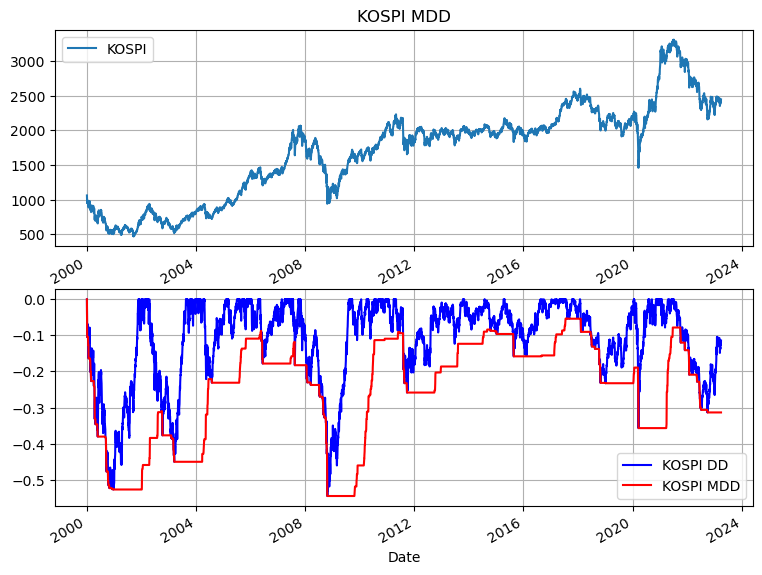

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt


pdr.get_data_yahoo('^KS11', '2000-01-01')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-01' )

window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()
 
plt.figure(figsize=(9, 7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


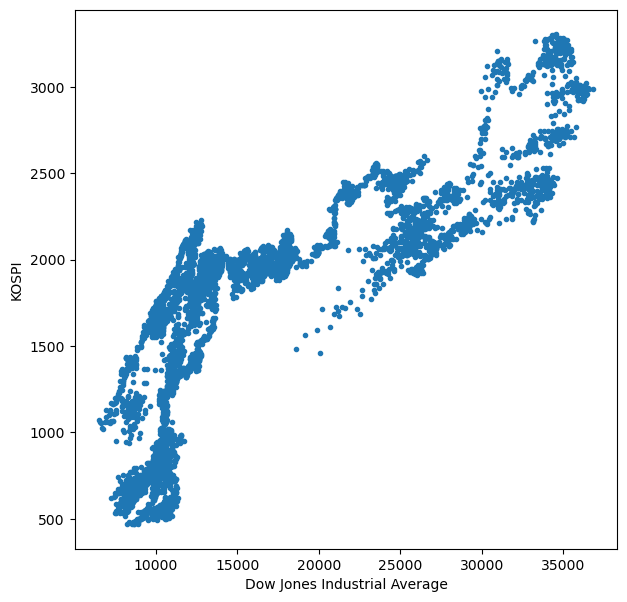

In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
 
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
df = yf.download('AAPL',
                       start= '2000-01-01',
                       end='2020-12-31',
                       progress=False)
df. head()                                       

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.850644  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.778925  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.790324  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.721930  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.756128  460734400

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf
df = yf.download('AAPL',
                       start= '2000-01-01',
                       end='2020-12-31',
                       progress=False)
df. head()
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-23  132.160004  132.429993  130.779999  130.960007  129.209290   
2020-12-24  131.320007  133.460007  131.100006  131.970001  130.205780   
2020-12-28  133.990005  137.339996  133.509995  136.690002  134.862671   
2020-12-29  138.050003  138.789993  134.339996  134.869995  133.067001   
2020-12-30  135.580002  135.990005  133.399994  133.720001  131.932388   

               Volume  
Date                   
2020-12-23   88223700  
2020-12-24   54930100  
2020-12-28  124486200  
2020-12-29  121047300  
2020-12-30   96452100

In [7]:
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
df = yf.download('AAPL',
                       start= '2000-01-01',
                       end='2020-12-31',
                       progress=False)
print(df. head(),df.tail())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.850643  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.778925  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.790324  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.721931  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.756127  460734400                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-23  132.160004  132.429993  130.779999  130.960007  129.209274   
2020-12-24  131.320007  133.460007  131.100006  131.970001  130.205765   
2020-12-28  133.990005  137.339996  133.509995  136.690002  134.862701   
2020-12-29  138.050003  138.789993  134.339996  134.869995  133.067017   
2020-12-30  135.580002  135.990005  133.39999

## 단순수익률과 로그수익률(AAPL)

In [8]:
import pandas as pd
import yfinance as yf
import numpy as np
df = yf.download('AAPL',
                       start= '2000-01-01',
                       end='2020-12-31',
                       progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_Close'}, inplace=True)
df['simple_rtn'] = df.adj_Close.pct_change()
df['log_rtn'] = np.log(df.adj_Close/df.adj_Close.shift(1))

In [9]:
print(df. head(),df.tail())

            adj_Close  simple_rtn   log_rtn
Date                                       
2000-01-03   0.850643         NaN       NaN
2000-01-04   0.778925   -0.084310 -0.088078
2000-01-05   0.790324    0.014633  0.014527
2000-01-06   0.721931   -0.086538 -0.090514
2000-01-07   0.756128    0.047369  0.046281              adj_Close  simple_rtn   log_rtn
Date                                        
2020-12-23  129.209305   -0.006976 -0.007000
2020-12-24  130.205795    0.007712  0.007683
2020-12-28  134.862671    0.035766  0.035141
2020-12-29  133.067001   -0.013315 -0.013404
2020-12-30  131.932373   -0.008527 -0.008563
